### Import necessary libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

### Import data

In [3]:
fraud_check_data = pd.read_csv('Fraud_check.csv')
fraud_check_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### Data understanding

In [4]:
fraud_check_data.rename(columns={'Work.Experience':'Work_Experience','Taxable.Income':'Taxable_Income'}, inplace=True)

In [5]:
fraud_check_data.shape

(600, 6)

In [6]:
fraud_check_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable_Income     0
City.Population    0
Work_Experience    0
Urban              0
dtype: int64

In [7]:
fraud_check_data.dtypes

Undergrad          object
Marital.Status     object
Taxable_Income      int64
City.Population     int64
Work_Experience     int64
Urban              object
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
fraud_check_data['encoded_Marital_Status'] = le.fit_transform(fraud_check_data['Marital.Status'])

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
fraud_check_data['encoded_Undergrad'] = le.fit_transform(fraud_check_data['Undergrad'])

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
fraud_check_data['encoded_Urban'] = le.fit_transform(fraud_check_data['Urban'])

In [11]:
del fraud_check_data['Urban']

In [12]:
del fraud_check_data['Marital.Status']

In [13]:
del fraud_check_data['Undergrad']

In [14]:
del fraud_check_data['City.Population']

In [15]:
fraud_check_data

,Taxable_Income,Work_Experience,encoded_Marital_Status,encoded_Undergrad,encoded_Urban
0,68833,10,2,0,1
1,33700,18,0,1,1
2,36925,30,1,0,1
3,50190,15,2,1,1
4,81002,28,1,0,0
...,...,...,...,...,...
595,76340,7,0,1,1
596,69967,2,0,1,1
597,47334,0,0,0,1
598,98592,17,1,1,0


In [16]:
fraud_check_data.dtypes

Taxable_Income            int64
Work_Experience           int64
encoded_Marital_Status    int32
encoded_Undergrad         int32
encoded_Urban             int32
dtype: object

In [17]:
fraud_check_data.shape

(600, 5)

In [18]:
fraud_check_data

,Taxable_Income,Work_Experience,encoded_Marital_Status,encoded_Undergrad,encoded_Urban
0,68833,10,2,0,1
1,33700,18,0,1,1
2,36925,30,1,0,1
3,50190,15,2,1,1
4,81002,28,1,0,0
...,...,...,...,...,...
595,76340,7,0,1,1
596,69967,2,0,1,1
597,47334,0,0,0,1
598,98592,17,1,1,0


### 4. Model Building

In [19]:
fraud_check_data["TaxInc"] = pd.cut(fraud_check_data["Taxable_Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [20]:
fraud_check_data

,Taxable_Income,Work_Experience,encoded_Marital_Status,encoded_Undergrad,encoded_Urban,TaxInc
0,68833,10,2,0,1,Good
1,33700,18,0,1,1,Good
2,36925,30,1,0,1,Good
3,50190,15,2,1,1,Good
4,81002,28,1,0,0,Good
...,...,...,...,...,...,...
595,76340,7,0,1,1,Good
596,69967,2,0,1,1,Good
597,47334,0,0,0,1,Good
598,98592,17,1,1,0,Good


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
fraud_check_data['TaxInc'] = le.fit_transform(fraud_check_data['TaxInc'])

In [22]:
fraud_check_data.head(20)

,Taxable_Income,Work_Experience,encoded_Marital_Status,encoded_Undergrad,encoded_Urban,TaxInc
0,68833,10,2,0,1,0
1,33700,18,0,1,1,0
2,36925,30,1,0,1,0
3,50190,15,2,1,1,0
4,81002,28,1,0,0,0
5,33329,0,0,0,0,0
6,83357,8,0,0,1,0
7,62774,3,2,1,1,0
8,83519,12,2,0,1,0
9,98152,4,0,1,1,0


In [23]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [24]:
fraud_check_data_norm = norm_func(fraud_check_data.iloc[:,1:])
fraud_check_data_norm.tail(10)

,Work_Experience,encoded_Marital_Status,encoded_Undergrad,encoded_Urban,TaxInc
590,0.466667,0.5,0.0,1.0,0.0
591,0.600000,1.0,1.0,1.0,1.0
592,0.533333,1.0,1.0,0.0,0.0
593,0.333333,0.0,0.0,1.0,0.0
594,0.300000,0.5,0.0,1.0,0.0
595,0.233333,0.0,1.0,1.0,0.0
596,0.066667,0.0,1.0,1.0,0.0
597,0.000000,0.0,0.0,1.0,0.0
598,0.566667,0.5,1.0,0.0,0.0
599,0.533333,0.0,0.0,0.0,0.0


In [25]:
X = fraud_check_data_norm.drop(labels='TaxInc',axis=1)
y= fraud_check_data_norm[['TaxInc']]

In [26]:
X

,Work_Experience,encoded_Marital_Status,encoded_Undergrad,encoded_Urban
0,0.333333,1.0,0.0,1.0
1,0.600000,0.0,1.0,1.0
2,1.000000,0.5,0.0,1.0
3,0.500000,1.0,1.0,1.0
4,0.933333,0.5,0.0,0.0
...,...,...,...,...
595,0.233333,0.0,1.0,1.0
596,0.066667,0.0,1.0,1.0
597,0.000000,0.0,0.0,1.0
598,0.566667,0.5,1.0,0.0


In [27]:
y

,TaxInc
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
595,0.0
596,0.0
597,0.0
598,0.0


In [28]:
X.shape,y.shape

((600, 4), (600, 1))

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
X_train.shape,y_train.shape

((480, 4), (480, 1))

In [31]:
X_test.shape,y_test.shape

((120, 4), (120, 1))

### 5. Model training

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
dt_model.score(X_train,y_train)

0.8645833333333334

In [34]:
dt_model.score(X_test,y_test)

0.7166666666666667

### 6.Data Visualization

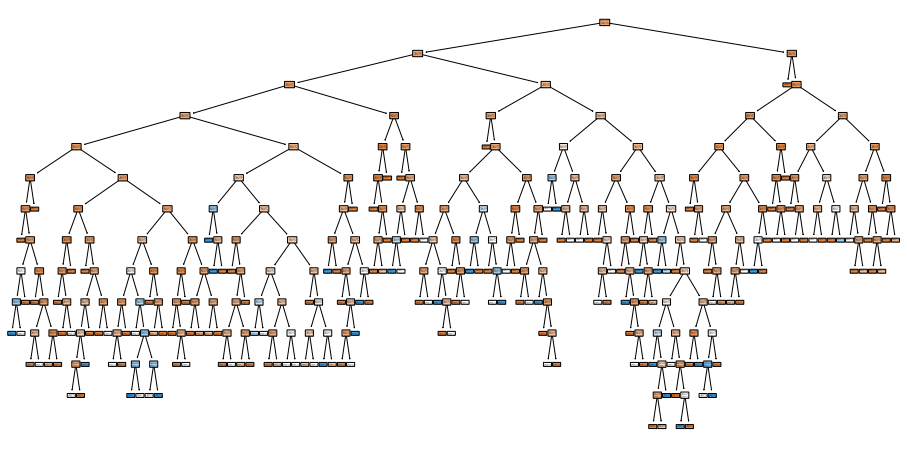

In [35]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(16,8))
plot_tree(dt_model,filled=True, rounded=True)
plt.show()

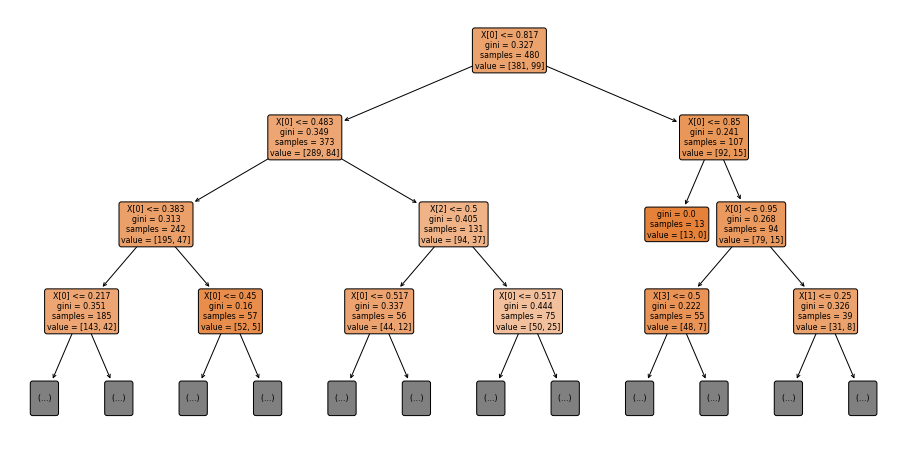

In [36]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(16,8))
plot_tree(dt_model,filled=True, rounded=True,max_depth=3)
plt.show()

### 7. Model testing

In [195]:
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

In [196]:
X_in = np.array([10,2,0,0])

In [197]:
y_pred1 = dt_model.predict([X_in])

In [198]:
y_pred

array([17962], dtype=int64)

### 8. Model evaluation

In [199]:
from sklearn.metrics import accuracy_score,confusion_matrix

##### Training data

In [200]:
accuracy_score(y_train,y_pred_train)

0.8645833333333334

In [201]:
print(confusion_matrix(y_train,y_pred_train))

[[376   5]
 [ 60  39]]


##### Test data

In [202]:
accuracy_score(y_test,y_pred_test)

0.7166666666666667

***As the model accuracy score is 0.86 the model is good**